In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import multilabel_confusion_matrix, precision_score,recall_score, accuracy_score,ConfusionMatrixDisplay

In [2]:
#procesamiento de datos
df=pd.read_csv("./Datos.csv")
df=df.drop(columns=["Unnamed: 0.1"]) 
df=pd.concat([df.loc[df["Unnamed: 0"]>=110,:]],ignore_index=True)
df=df.drop(columns=["Unnamed: 0","Thumb","Index","Middle","Ring","Pinkie"]) 

In [3]:
train_data, test_data = train_test_split(df, train_size=0.7, random_state=20, stratify=df["Gesto"])
test_data, dev_data = train_test_split(test_data, train_size=(2/3), random_state=20, stratify=test_data["Gesto"])
print("distribucion de gestos set entrenamiento:")
print(train_data["Gesto"].value_counts())
print("distribucion de gestos set test:")
print(test_data["Gesto"].value_counts())
print("distribucion de gestos set dev:")
print(dev_data["Gesto"].value_counts())

distribucion de gestos set entrenamiento:
1.0    2560
3.0    2543
7.0    2543
5.0    2543
6.0    2540
2.0    2531
4.0    2520
Name: Gesto, dtype: int64
distribucion de gestos set test:
1.0    731
3.0    727
7.0    727
6.0    726
5.0    726
2.0    723
4.0    720
Name: Gesto, dtype: int64
distribucion de gestos set dev:
1.0    366
7.0    363
3.0    363
5.0    363
6.0    363
2.0    362
4.0    360
Name: Gesto, dtype: int64


           emg1      emg2      emg3      emg4      emg5      emg6      emg7  \
emg1   1.000000  0.501102  0.137696  0.176284  0.353830  0.227659  0.173941   
emg2   0.501102  1.000000  0.676430  0.276862  0.396858  0.303103  0.560401   
emg3   0.137696  0.676430  1.000000  0.485022  0.275043  0.213057  0.442774   
emg4   0.176284  0.276862  0.485022  1.000000  0.532297  0.223659  0.291138   
emg5   0.353830  0.396858  0.275043  0.532297  1.000000  0.687322  0.482828   
emg6   0.227659  0.303103  0.213057  0.223659  0.687322  1.000000  0.596226   
emg7   0.173941  0.560401  0.442774  0.291138  0.482828  0.596226  1.000000   
emg8   0.343603  0.463822  0.432407  0.277969  0.384064  0.398711  0.688055   
Gesto -0.071478 -0.253749 -0.323131 -0.111613 -0.045360  0.016616 -0.165780   

           emg8     Gesto  
emg1   0.343603 -0.071478  
emg2   0.463822 -0.253749  
emg3   0.432407 -0.323131  
emg4   0.277969 -0.111613  
emg5   0.384064 -0.045360  
emg6   0.398711  0.016616  
emg7   0.6880

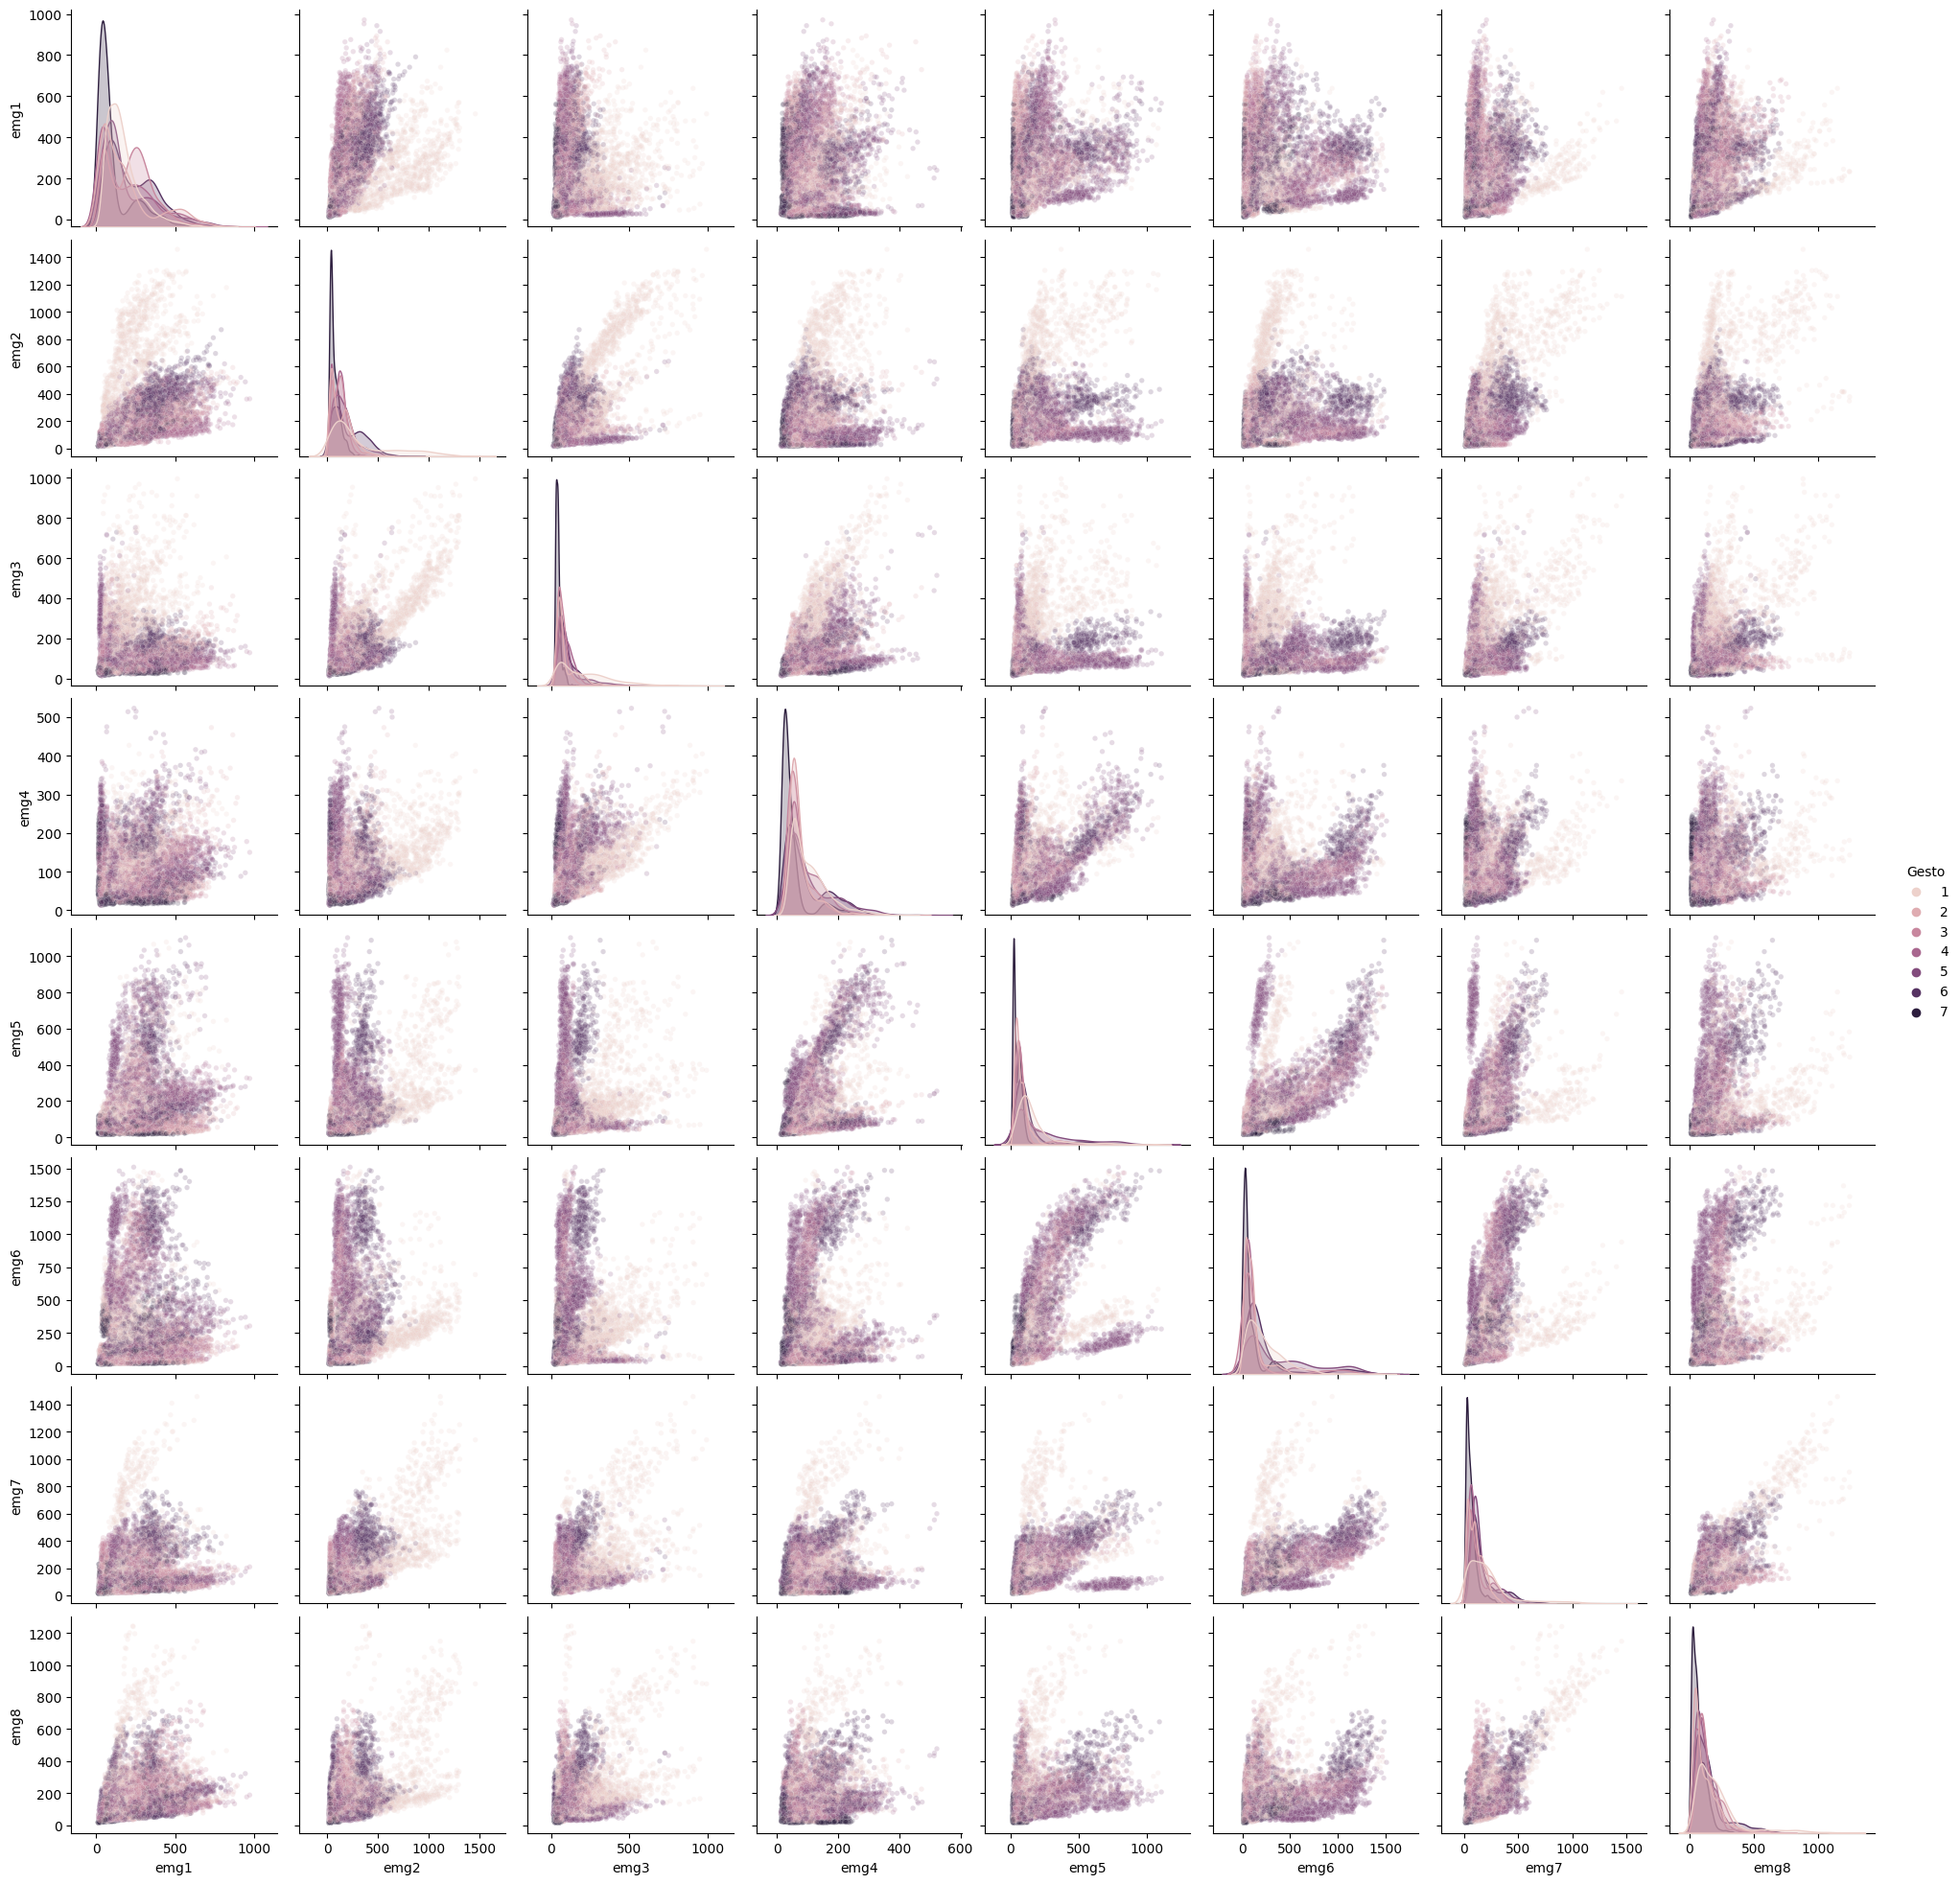

In [4]:
#%% Matriz de correlacion
sns.pairplot(train_data, hue='Gesto',plot_kws = {'alpha': 0.2, 's': 15})
corr_matrix = train_data.corr()
print(corr_matrix)

In [5]:
Sensor_tr=train_data.drop(["Gesto"],axis=1)
Gesto_t=train_data["Gesto"].copy()
Sensor_ts=test_data.drop(["Gesto"],axis=1)
Gesto_s=test_data["Gesto"].copy()
def dedo(n):
    return lambda x: (x==n or x==1)*1
a=dedo(2)
b=dedo(3)
c=dedo(4)
d=dedo(5)
e=dedo(6)
Gesto_tr=pd.DataFrame([])
Gesto_ts=pd.DataFrame([])
Gesto_tr["pul"]=Gesto_t.transform([a])
Gesto_tr["ind"]=Gesto_t.transform([b])
Gesto_tr["mid"]=Gesto_t.transform([c])
Gesto_tr["anl"]=Gesto_t.transform([d])
Gesto_tr["pin"]=Gesto_t.transform([e])
Gesto_ts["pul"]=Gesto_s.transform([a])
Gesto_ts["ind"]=Gesto_s.transform([b])
Gesto_ts["mid"]=Gesto_s.transform([c])
Gesto_ts["anl"]=Gesto_s.transform([d])
Gesto_ts["pin"]=Gesto_s.transform([e])


c:\Users\DAVID\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Acurracy MLP: 0.8362204724409449
Acurracy RF: 0.3572834645669291


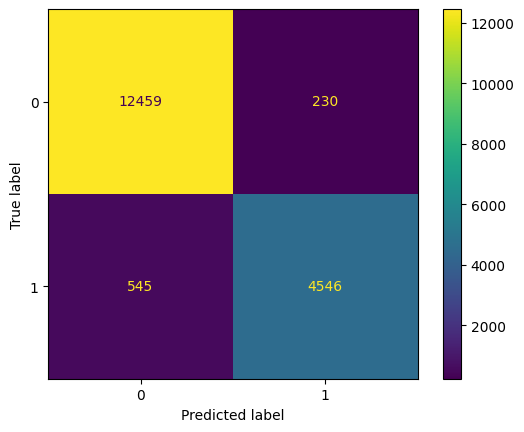

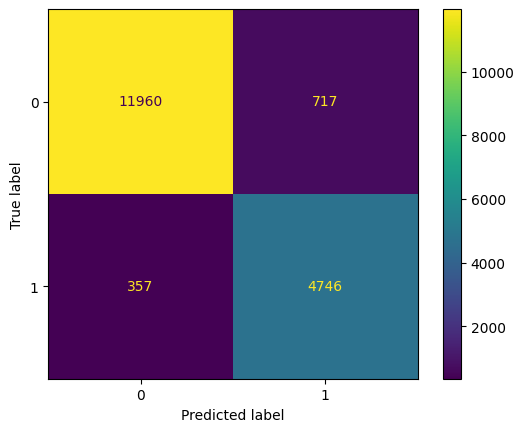

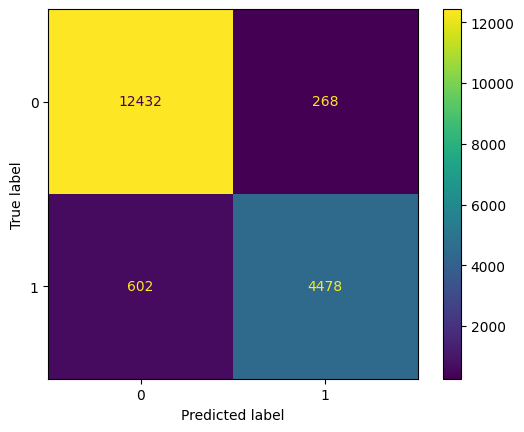

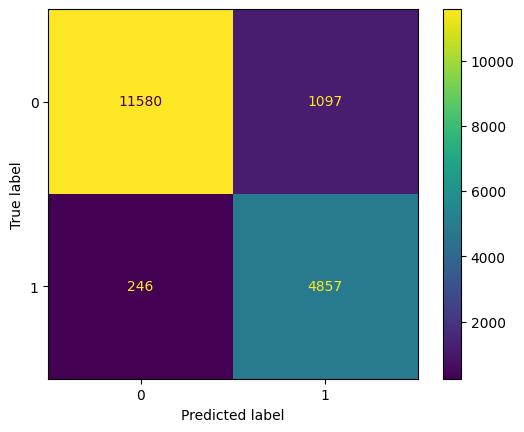

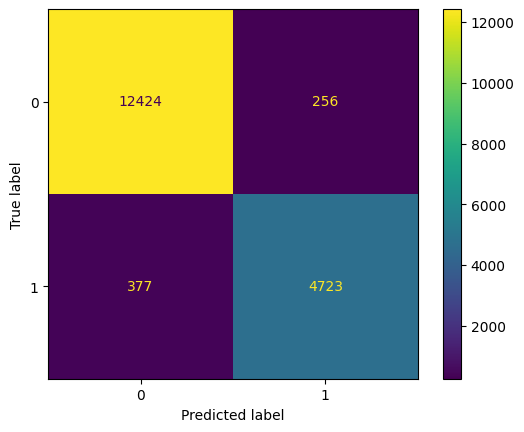

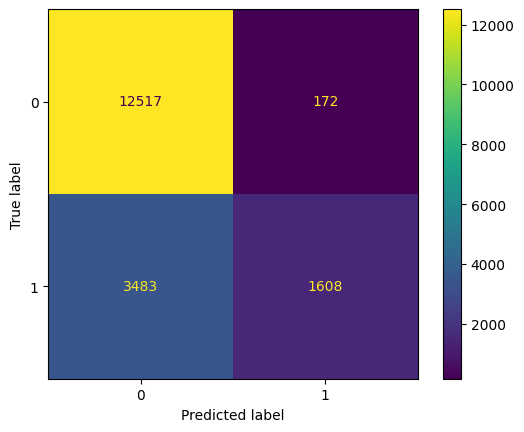

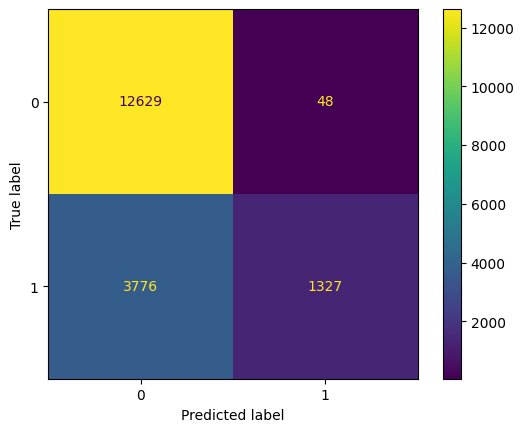

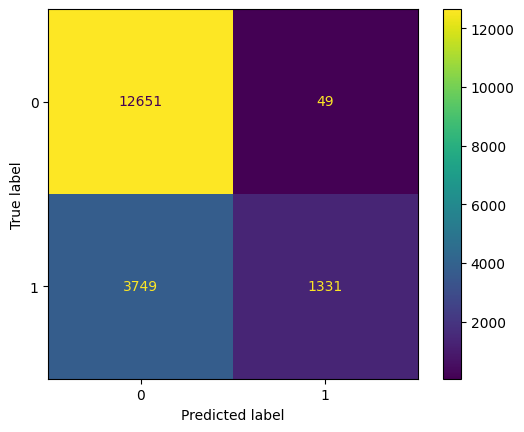

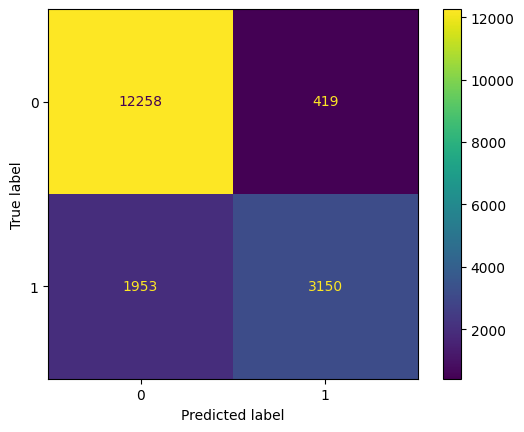

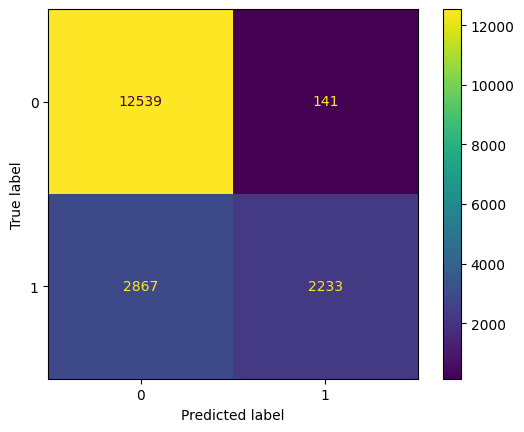

In [8]:

MLP=MultiOutputClassifier(MLPClassifier(random_state=1,hidden_layer_sizes=500))
Gesto_cv_MLP=cross_val_predict(MLP,Sensor_tr,Gesto_tr,cv=5)
MLP.fit(Sensor_tr,Gesto_tr)
MLP_cm = multilabel_confusion_matrix(Gesto_tr,Gesto_cv_MLP)

for i in range(5):
    disp2 = ConfusionMatrixDisplay(confusion_matrix=MLP_cm[i,:,:])
    disp2.plot()
print(f"Acurracy MLP: {MLP.score(Sensor_ts,Gesto_ts)}")

RF= MultiOutputClassifier(RandomForestClassifier(max_depth=5))
Gesto_cv_RF=cross_val_predict(RF,Sensor_tr,Gesto_tr,cv=5)
RF.fit(Sensor_tr,Gesto_tr)
RF_cm = multilabel_confusion_matrix(Gesto_tr,Gesto_cv_RF)
for i in range(5):
    disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm[i,:,:])
    disp.plot()
print(f"Acurracy RF: {RF.score(Sensor_ts,Gesto_ts)}")


In [12]:
from joblib import dump
print(f"Acurracy MLP: {MLP.score(Sensor_tr,Gesto_tr)}")
print(f"Acurracy RF: {RF.score(Sensor_tr,Gesto_tr)}")
dump(MLP,"./Multiclass.joblib")

Acurracy MLP: 0.8681102362204725
Acurracy RF: 0.3703599550056243


['./Multiclass.joblib']